# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [22]:
sinasc_raw = pd.read_csv('/content/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [23]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [24]:
sinasc_2 = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI']]
sinasc_2.head

<bound method NDFrame.head of                     munResNome  IDADEMAE  IDADEPAI
0        Alta Floresta D'Oeste        19      26.0
1        Alta Floresta D'Oeste        29      24.0
2        Alta Floresta D'Oeste        37      32.0
3      Alto Alegre dos Parecis        30      24.0
4        Alta Floresta D'Oeste        30      27.0
...                        ...       ...       ...
27023                  Vilhena        32      35.0
27024              Chupinguaia        19       NaN
27025                  Vilhena        24      30.0
27026                  Vilhena        21      24.0
27027  Novo Horizonte do Oeste        18       NaN

[27028 rows x 3 columns]>

In [25]:
sinasc_2.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [26]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [27]:
data_niver = pd.to_datetime('2019-06-23')
dados_niver = sinasc_raw[sinasc_raw['DTNASC'] == data_niver]

In [28]:
dados_niver.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
ESCMAE,,
12 anos ou mais,3172.500000,3218.818182
4 a 7 anos,2763.333333,3295.000000
8 a 11 anos,2949.454545,3371.818182


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [29]:
sinasc_raw.munResNome.value_counts().to_frame().sort_values('munResNome')[:5]

,munResNome
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44


Ignorei os valores do Município ignorado - RO, pois pode ter falta de valores, logo considerei castanheiras

In [30]:
from numpy.core.fromnumeric import mean
sinasc_3 = sinasc_raw[['munResNome','IDADEPAI','IDADEMAE']]
sinasc_3[sinasc_3['munResNome'] == 'Castanheiras'].groupby(['munResNome']).agg([min,max,mean])

IDADEPAI                  IDADEMAE              
                  min   max       mean      min max      mean
munResNome                                                   
Castanheiras     17.0  43.0  30.392857       17  39  27.28125

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [31]:
sinasc_mar = sinasc_raw[sinasc_raw.DTNASC.dt.month == 3].copy()
sinasc_mar['MES'] = sinasc_mar['DTNASC'].dt.month_name()
sinasc_mar['COUNT'] = 1

In [37]:
sinasc_5 = sinasc_mar.groupby(by=['MES',
                                  'munResNome']
                             )[['COUNT',
                                'QTDFILVIVO',
                                'IDADEMAE',
                                'IDADEPAI']
                              ].agg({'COUNT':[('Qtd de bebês nascidos','count')],
                                     'QTDFILVIVO':[('Média','mean'),
                                                   ('Máx',max),
                                                   ('Mín',min)],
                                     'IDADEMAE':[('Média','mean'),
                                                 ('Máx',max),
                                                 ('Mín',min)],
                                     'IDADEPAI':[('Média','mean'),
                                                 ('Máx',max),
                                                 ('Mín',min)]
                                    })
sinasc_5.sort_values(('COUNT', 'Qtd de bebês nascidos'),
                     ascending=False
                    )[:10]

COUNT QTDFILVIVO            \
                          Qtd de bebês nascidos      Média  Máx  Mín   
MES   munResNome                                                       
March Porto Velho                           744   1.295056  9.0  0.0   
      Ji-Paraná                             188   0.828877  4.0  0.0   
      Vilhena                               148   0.979592  5.0  0.0   
      Ariquemes                             141   1.064748  4.0  0.0   
      Cacoal                                133   0.969697  7.0  0.0   
      Jaru                                   80   1.025641  5.0  0.0   
      Guajará-Mirim                          75   1.534247  8.0  0.0   
      Rolim de Moura                         69   0.724638  5.0  0.0   
      Ouro Preto do Oeste                    67   1.014925  5.0  0.0   
      Pimenta Bueno                          62   0.836066  4.0  0.0   

                            IDADEMAE           IDADEPAI              
                               Média Máx Mín      Média   Máx   Mín  
MES   munResNome                                                     
March Porto Velho          26.596774  44  14  34.629032  62.0  19.0  
      Ji-Paraná            25.377660  44  13  30.831579  56.0  16.0  
      Vilhena              26.412162  39  16  33.562500  47.0  27.0  
      Ariquemes            25.304965  42  14  28.666667  29.0  28.0  
      Cacoal               26.466165  40  15  30.008197  47.0  17.0  
      Jaru                 26.550000  40  14  33.500000  41.0  21.0  
      Guajará-Mirim        26.333333  43  14  34.500000  43.0  26.0  
      Rolim de Moura       27.594203  41  18  31.257576  50.0  19.0  
      Ouro Preto do Oeste  25.522388  44  14  30.175000  57.0  19.0  
      Pimenta Bueno        25.177419  39  14  29.611111  49.0  17.0

O município que mais nasceu bebê no mês de março foi Porto Velho com 744	 nascimentos.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [40]:
sinasc_week = sinasc_raw.copy()
sinasc_week['DTNASC'] = pd.to_datetime(sinasc_week['DTNASC'])
sinasc_week = sinasc_week.set_index('DTNASC')

In [41]:
sinasc_week['DIASEMANA'] = sinasc_week.index.dayofweek
sinasc_week['DIASEMANA']

DTNASC
2019-02-19    1
2019-02-21    3
2019-02-25    0
2019-03-20    2
2019-03-23    5
             ..
2019-12-13    4
2019-10-04    4
2019-08-02    4
2019-12-23    0
2019-12-27    4
Name: DIASEMANA, Length: 27028, dtype: int64

<Axes: xlabel='DIASEMANA'>

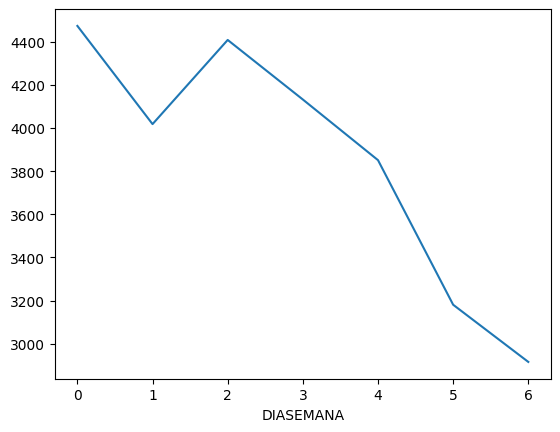

In [42]:
sinasc_week[['DIASEMANA', 'PARTO']].groupby('DIASEMANA')['PARTO'].count().plot()

<Axes: xlabel='DIASEMANA'>

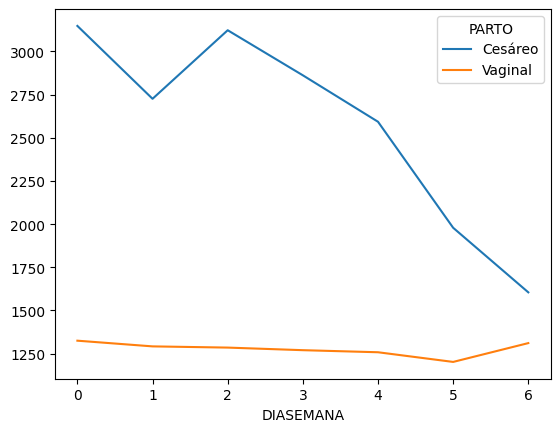

In [43]:
sinasc_week[['DIASEMANA', 'PARTO']].groupby(['DIASEMANA', 'PARTO'])['PARTO'].count().unstack().plot()

Com base nos resultados apresentados, podemos observar que:

- A média de filhos vivos se mantém em proximo de 1, independentemente da quantidade de bebês nascidos, em todos os municípios do estado.
- A média de idade dos pais é geralmente maior do que a das mães na maioria dos municípios.
-Os partos por dia da semana tendem a ter uma queda em relacao aos do de final de semana.
-Se analisarmos por tipo de parto, percebemos que o tipo cesareo sao os de maiores volumes.
